Check mass thresh:

In [3]:
import numpy as np
from gal_goku import get_corr


basedir = '/scratch/06536/qezlou/Goku/FOF/L2'
sim_tag = 'compressed_10p_Box250_Part750_0303'
pig_dir = f'{basedir}/{sim_tag}/output/PIG_003/'
save_dir = '/scratch/06536/qezlou/Goku/processed_data/check_false_positive/'


corr = get_corr.Corr()

cat = corr.load_halo_cat(pig_dir=pig_dir)
cat.attrs

[ 000000.00 ]   0: 02-21 10:10  get corr        INFO     Logger initialized at level: 20
[ 000000.00 ]   0: 02-21 10:10  get corr        INFO     MPI_COMM_WORLD | size = 1 -- Nbkit COMM | size = 1


{'BoxSize': array([250.]),
 'CMBTemperature': array([2.7255]),
 'HubbleParam': array([0.73237333]),
 'MassTable': array([0.        , 0.25368043, 0.        , 0.        , 0.        ,
        0.        ]),
 'NumFOFGroupsTotal': array([382736], dtype=uint64),
 'NumPartInGroupTotal': array([       0, 43130152,        0,        0,        0,        0],
       dtype=uint64),
 'Omega0': array([0.25588]),
 'OmegaBaryon': array([0.04015]),
 'OmegaLambda': array([0.]),
 'RSDFactor': array([10.55191866]),
 'Time': array([0.285714]),
 'UsePeculiarVelocity': array([1], dtype=int32),
 'redshift': array([2.5000035]),
 'cosmo': {'output': 'vTk dTk mPk',
  'extra metric transfer functions': 'y',
  'h': 0.6774,
  'N_ur': 2.0328,
  'gauge': 'synchronous',
  'n_s': 0.9667,
  'ln10^{10}A_s': 3.064,
  'k_pivot': 0.05,
  'tau_reio': 0.066,
  'T_cmb': 2.7255,
  'Omega_cdm': 0.2589,
  'Omega_b': 0.0486,
  'Omega_k': 0.0,
  'N_ncdm': 1,
  'm_ncdm': [0.06],
  'P_k_max_h/Mpc': 10.0,
  'z_max_pk': 100.0},
 'mass': '

In [17]:
np.array(cat['Mass'][10:20])
print(cat['Mass'])
ind = cat['Mass'] > 1e11
new_cat = cat[ind]
print(new_cat, cat)

dask.array<mul, shape=(382736,), dtype=float32, chunksize=(100000,), chunktype=numpy.ndarray> first: 65690550000000.0 last: 81177740000.0
HaloCatalog(size=295748) HaloCatalog(size=382736)


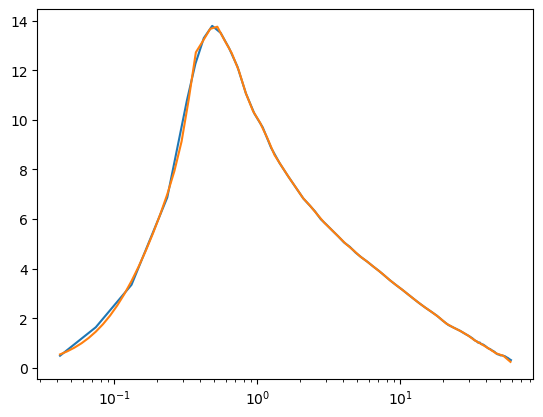

In [7]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from gal_goku import utils
with h5py.File('/scratch/06536/qezlou/Goku/processed_data/corrs_bins/test.hdf5','r') as f:
    mbins = f['mbins'][:]
    corr = f['corr'][:]
    fig, ax = plt.subplots()
    ax.plot(mbins, mbins*corr)
    fit = utils.ConstrainedSplineFitter(logging_level='INFO', degree=3)
    knots = np.array([mbins[0]]*3)
    knots = np.append(knots, mbins)
    knots = np.append(mbins, [mbins[-1]]*3)
    spline = fit.fit_spline(mbins, corr, knots= knots)

    fine_mbins = 10**np.arange(np.log10(mbins[0]), np.log10(mbins[-1])+0.02, 0.05)
    ax.plot(fine_mbins, fine_mbins*spline(fine_mbins))
    ax.set_xscale('log')
    #ax.set_yscale('log')